# LDDS

## Tutorial 12: Integration Time & Grid Resolution for Lagrangian descriptor Simulations

In this tutorial notebook we demonstrate how the integration time (number of iterations for discrete systems) and grid resolution used to calculate Lagrangian descriptors are two fundamental parameters of the method that should be explored in detail when analyzing the phase space structures governing the dynamics of any system. We illustrate the relevance of this parameters by applying this technique to two model systems: the double gyre flow as an example of a continuous dynamical system, and Arnold's cat map for a discrete-time system

In [1]:
import os, sys
sys.path.insert(1, os.pardir)
import ldds
from ldds.vector_fields import DoubleGyre
from ldds.base_discrete import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds
import numpy as np

## Arnold's Cat Map

This map is defined by the following difference equations:

\begin{cases}
   x_{n+1} = 2x_n + y_n \; \text{mod } 1 \\[.2cm]
   y_{n+1} = x_n + y_n \; \text{mod } 1
\end{cases}

and the inverse map is given by:

\begin{cases}
   x_{n} = x_{n+1} - y_{n+1} \; \text{mod } 1 \\[.2cm]
   y_{n} = -x_{n+1} + 2y_{n+1} \; \text{mod } 1
\end{cases}


### Define the Map

In [2]:
import numpy as np

def ArnoldCat(t_initial, u_initial, PARAMETERS=[1]):
    """Arnold Cat map"""
    x_initial, y_initial = u_initial.T
    
    # Map parameters
    time_step = PARAMETERS[0]
    
    # Map components
    t_next = t_initial + time_step
    x_next = 2*x_initial + y_initial
    y_next = x_initial + y_initial
    
    # Map next iteration
    u_next = np.column_stack([x_next, y_next])
    
    return t_next, u_next

### Define the Inverse Map

In [3]:
import numpy as np

def ArnoldCat_inverse(t_initial, u_initial, PARAMETERS=[1]):
    """Arnold Cat map inverse"""
    x_initial, y_initial = u_initial.T
    
    # Map parameters
    time_step = PARAMETERS[0]
    
    # Map components
    t_next = t_initial + time_step
    x_next = x_initial - y_initial
    y_next = -x_initial + 2*y_initial
    
    # Map next iteration
    u_next = np.column_stack([x_next, y_next])
    
    return t_next, u_next

In [4]:
discrete_map = ArnoldCat
discrete_map_inv = ArnoldCat_inverse

### Define Grid to Calculate LDs and LD parameters

We will use first a very small number of iterations for the map

In [5]:
# Phase Space Grid Information
x_min, x_max, Nx = [0, 1, 400]
y_min, y_max, Ny = [0, 1, 400]
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

# LD Method Parameters
p_value = 1
N_iterations = 2
box_boundaries = False
periodic_boundaries = [(0, 1), (0, 1)]

### Calculate and Plot Lagrangian Descriptors (Iterations $N = 2$)

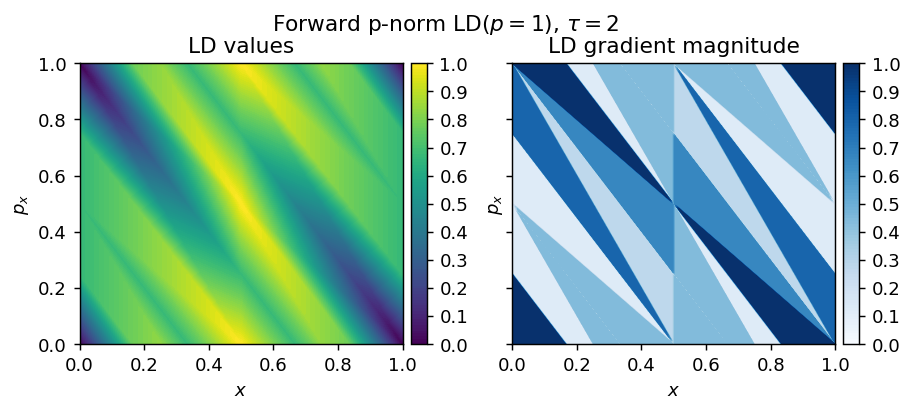

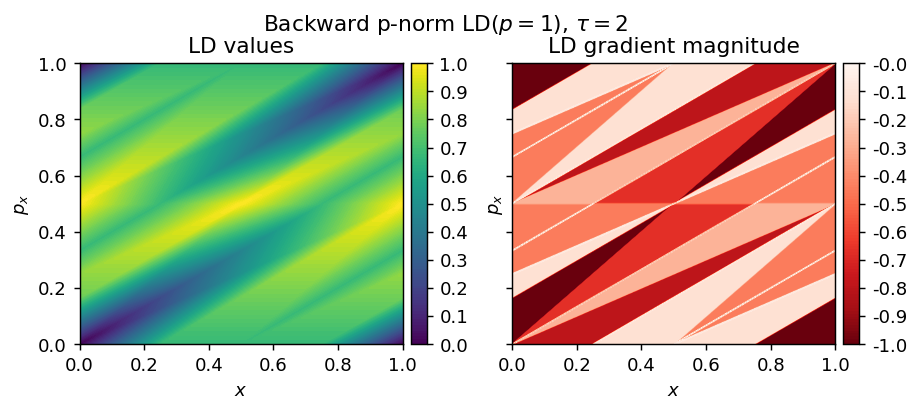

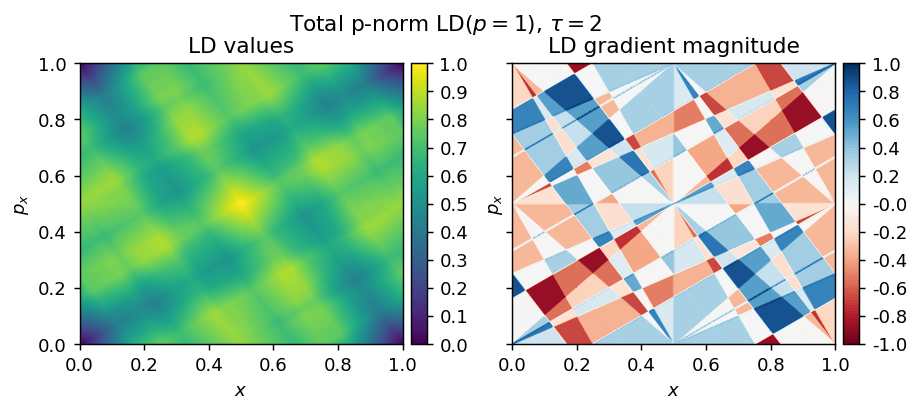

In [6]:
# Compute LDs
LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value, box_boundaries, periodic_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map_inv, N_iterations, p_value, box_boundaries, periodic_boundaries)

# Draw LDs
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

### Calculate and Plot Lagrangian Descriptors (Iterations $N = 5$)

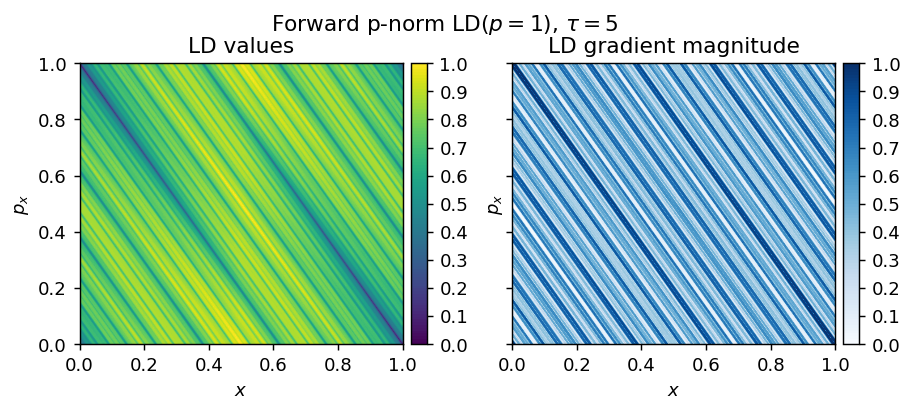

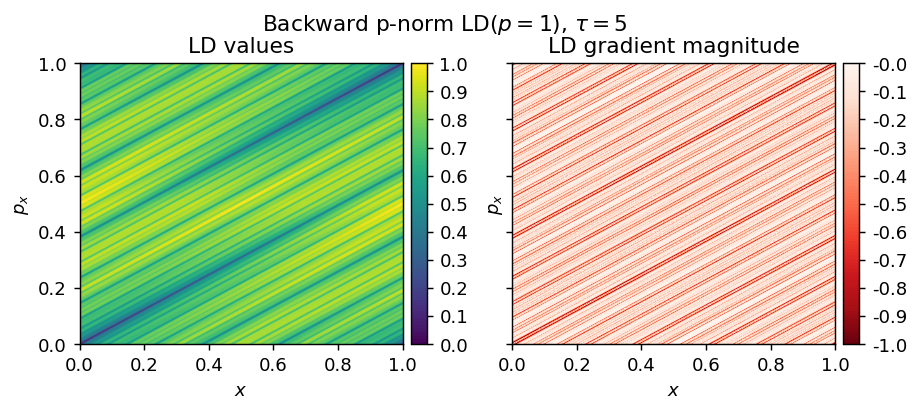

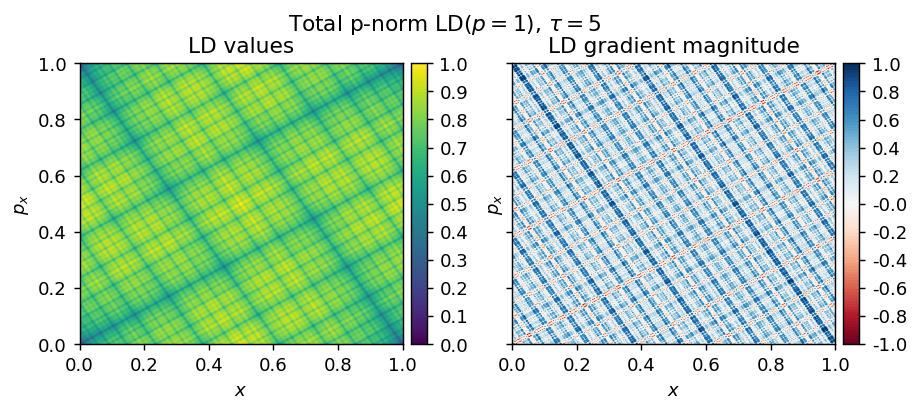

In [7]:
# We increase next the number of iterations to calculate LDs
N_iterations = 5

# Compute LDs
LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value, box_boundaries, periodic_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map_inv, N_iterations, p_value, box_boundaries, periodic_boundaries)

# Draw LDs
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

### Calculate and Plot Lagrangian Descriptors (Iterations $N = 15$)

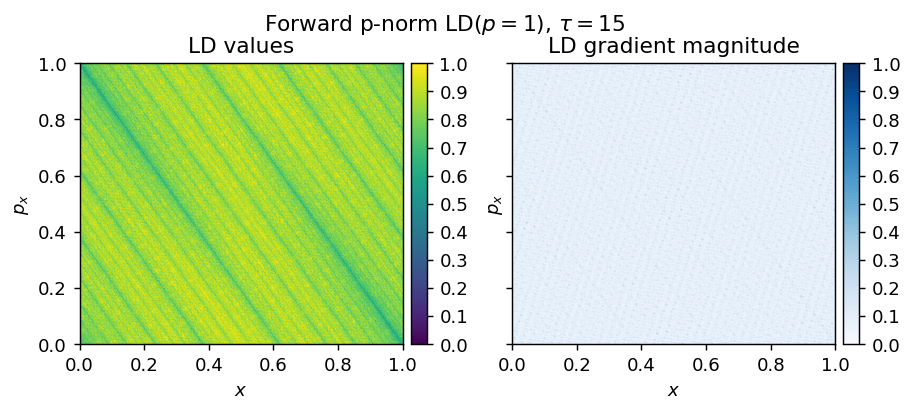

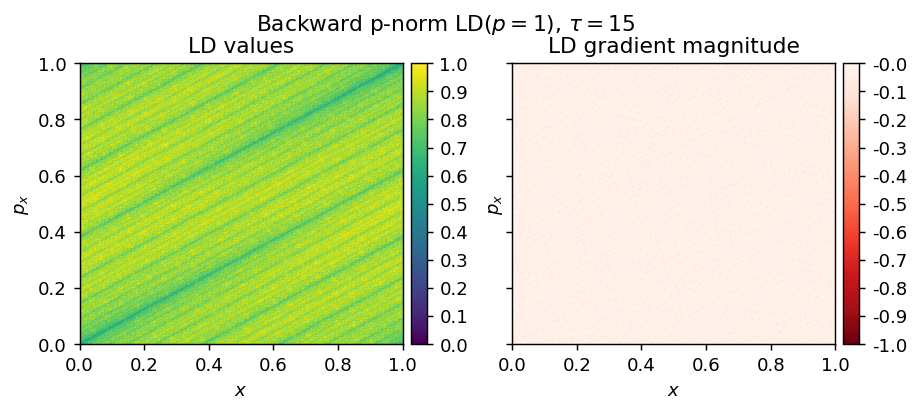

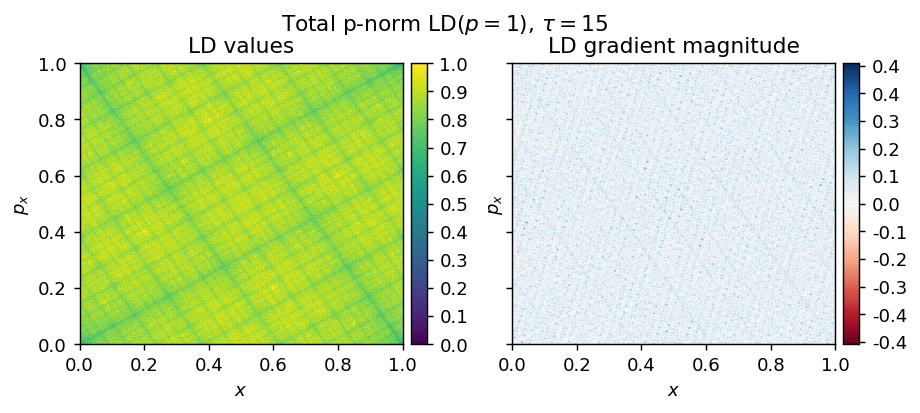

In [8]:
# We increase further the number of iterations to calculate LDs
N_iterations = 15

# Compute LDs
LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value, box_boundaries, periodic_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map_inv, N_iterations, p_value, box_boundaries, periodic_boundaries)

# Draw LDs
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

### Lagrangian Descriptors for Different Grid Sizes (Fixed Number of Iterations $N = 5$)

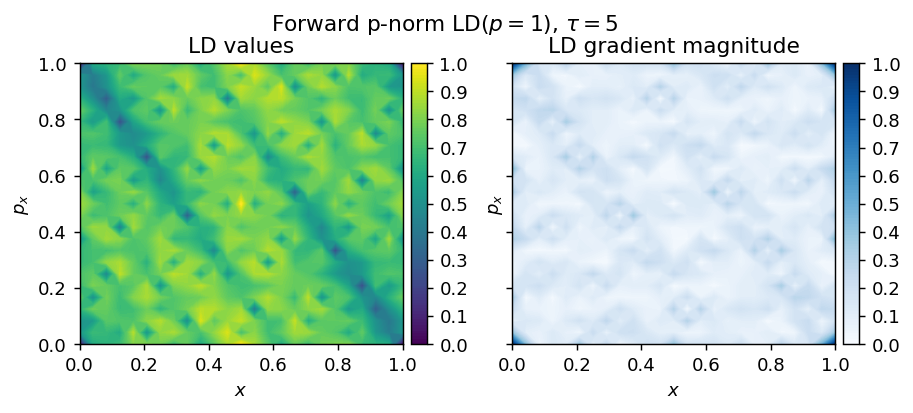

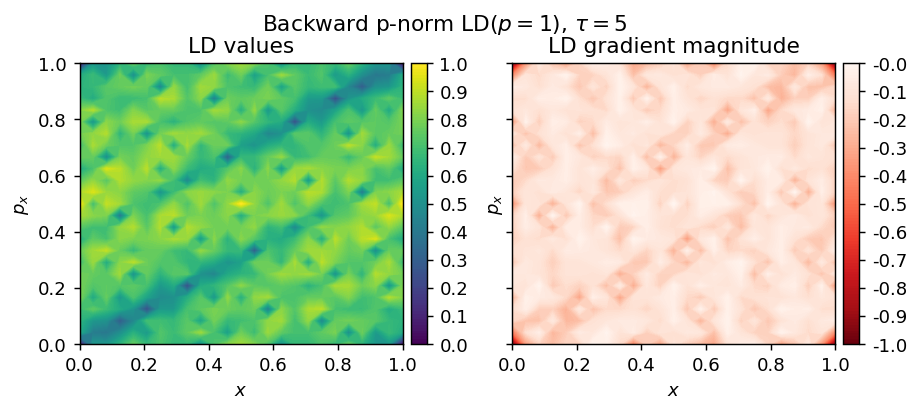

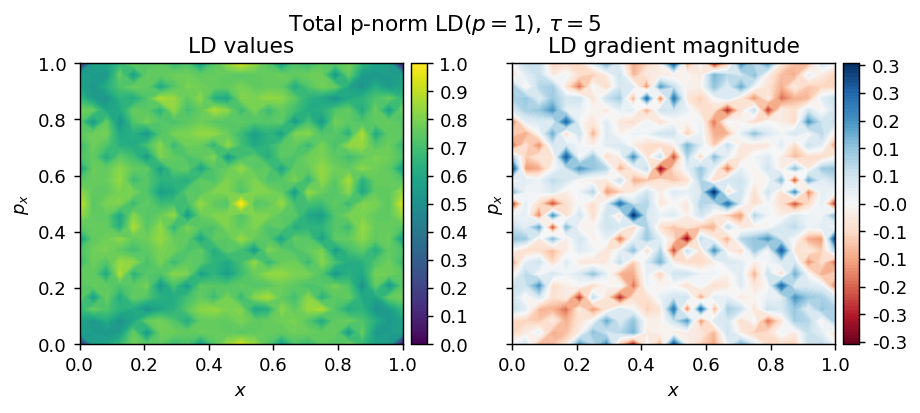

In [9]:
N_iterations = 5

# Phase Space Grid Information
x_min, x_max, Nx = [0, 1, 25]
y_min, y_max, Ny = [0, 1, 25]
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

# Compute LDs
LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value, box_boundaries, periodic_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map_inv, N_iterations, p_value, box_boundaries, periodic_boundaries)

# Draw LDs
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

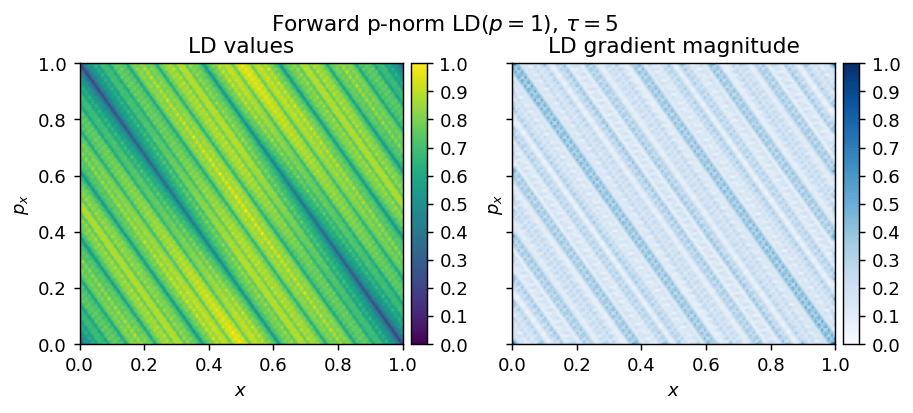

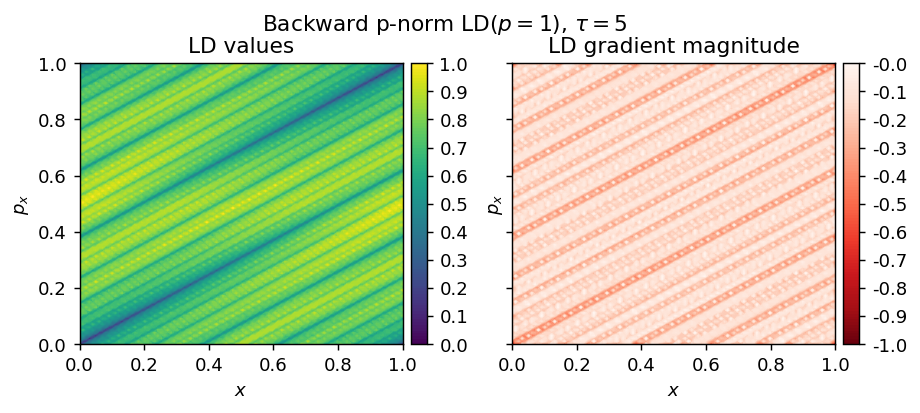

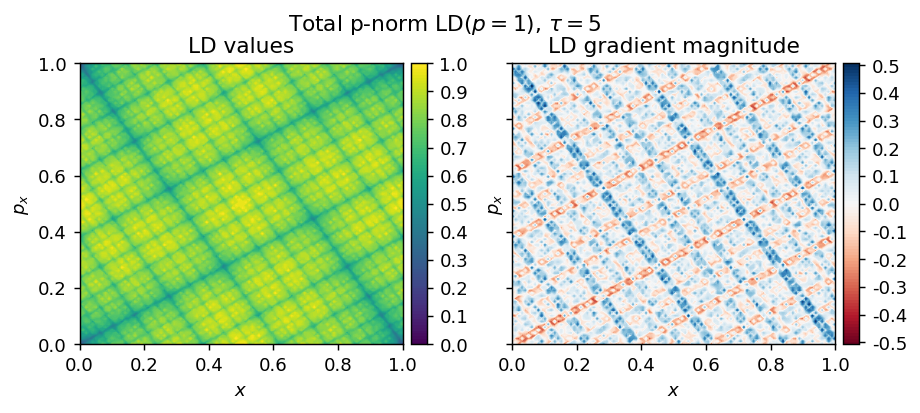

In [10]:
# Phase Space Grid Information
x_min, x_max, Nx = [0, 1, 100]
y_min, y_max, Ny = [0, 1, 100]
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

# Compute LDs
LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value, box_boundaries, periodic_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map_inv, N_iterations, p_value, box_boundaries, periodic_boundaries)

# Draw LDs
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

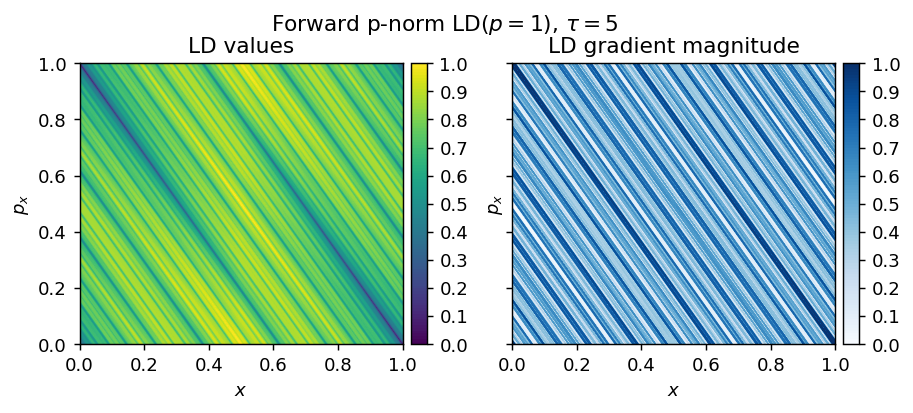

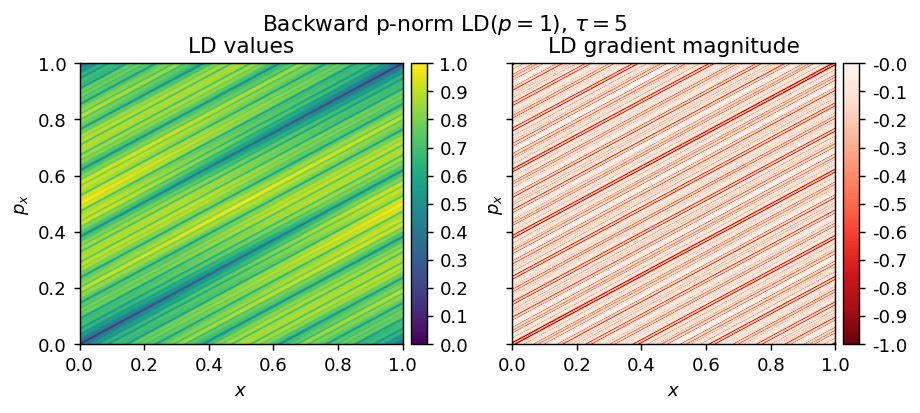

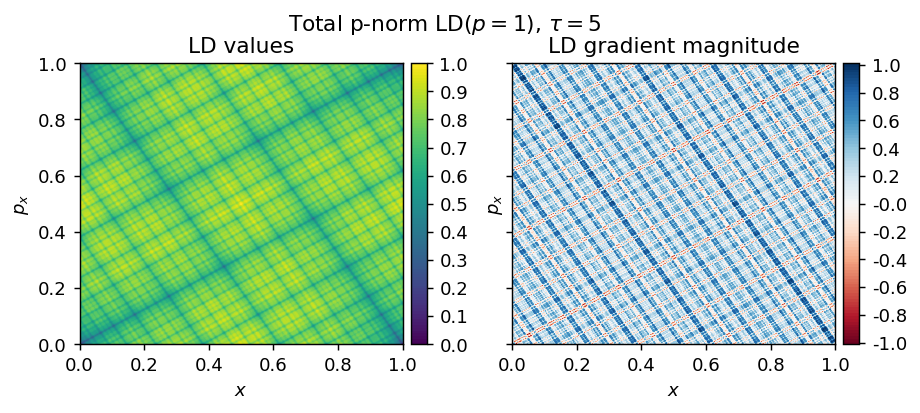

In [11]:
# Phase Space Grid Information
x_min, x_max, Nx = [0, 1, 500]
y_min, y_max, Ny = [0, 1, 500]
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

# Compute LDs
LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map, N_iterations, p_value, box_boundaries, periodic_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map_inv, N_iterations, p_value, box_boundaries, periodic_boundaries)

# Draw LDs
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

## The Double Gyre Flow

The double gyre flow is described by the following system of ODEs:

\begin{cases}
   \dfrac{dx}{dt} = -\pi A \sin\left(\dfrac{\pi f(x,t)}{s}\right)\cos\left(\dfrac{\pi y}{s}\right) - \mu x \\[.2cm]
   \dfrac{dy}{dt} = \pi A \cos\left(\dfrac{\pi f(x,t)}{s}\right)\sin\left(\dfrac{\pi y}{s}\right)\dfrac{\partial f}{\partial x}\left(x,t\right) - \mu y
\end{cases}

and we have that:

$$
f(x,t) = \varepsilon \sin(\omega t + \phi) x^2 + \left[1-2\varepsilon\sin(\omega t + \phi)\right] x
$$

In [12]:
# Import the function that calculates LDs for continuous-time dynamical systems
from ldds.base import compute_lagrangian_descriptor

### Define the vector field

In [13]:
phase_shift, A, phi, psi, mu, s, epsilon = [0, 0.1, 0.5, 0, 0, 1, 0.1]
vector_field = lambda t,u: DoubleGyre(t, u, PARAMETERS = [phase_shift, A, phi, psi, mu, s, epsilon])

### Define the 2D Grid to Compute LDs

In [14]:
# Mesh parameters
x_min,x_max = [0, 2]
y_min,y_max = [0, 1]
Nx, Ny = [150, 150]
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

### Define Parameters for Lagrangian Descriptors

In [15]:
tau = 5
p_value = 1/2

### Calculate LDs ($\tau = 5$)

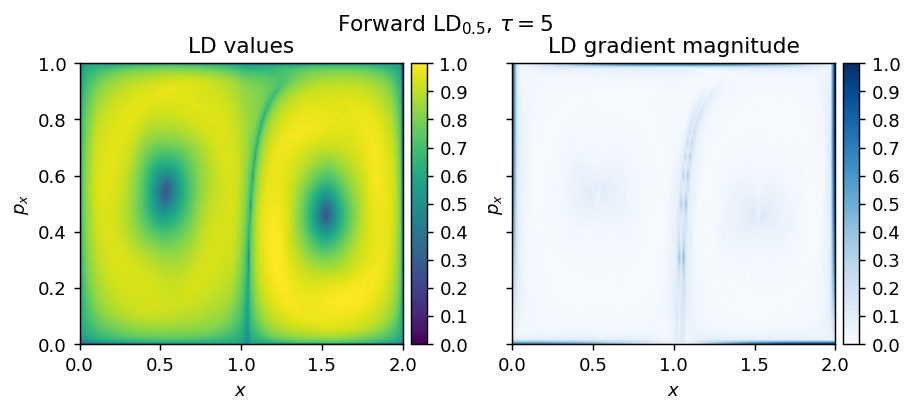

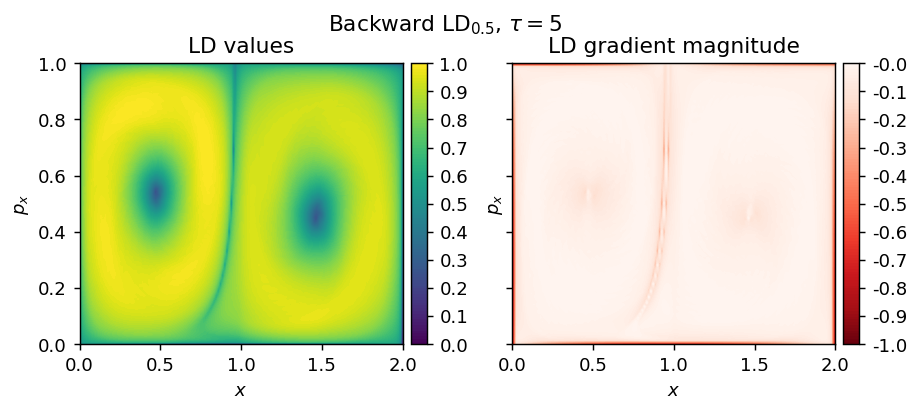

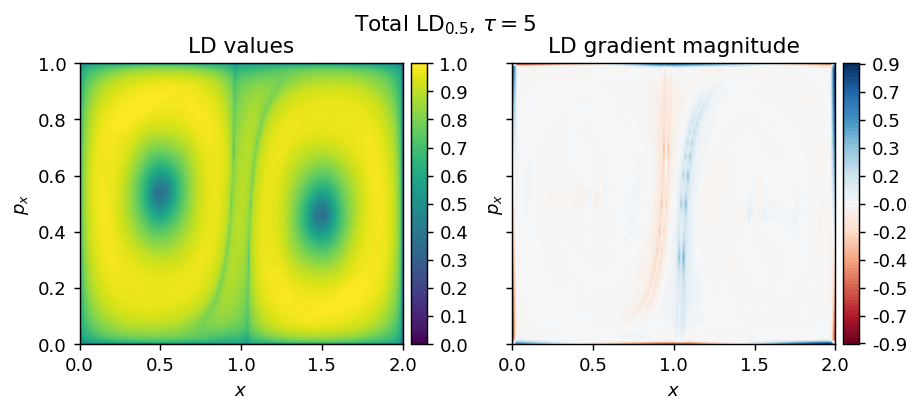

In [16]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

### Calculate LDs ($\tau = 15$)

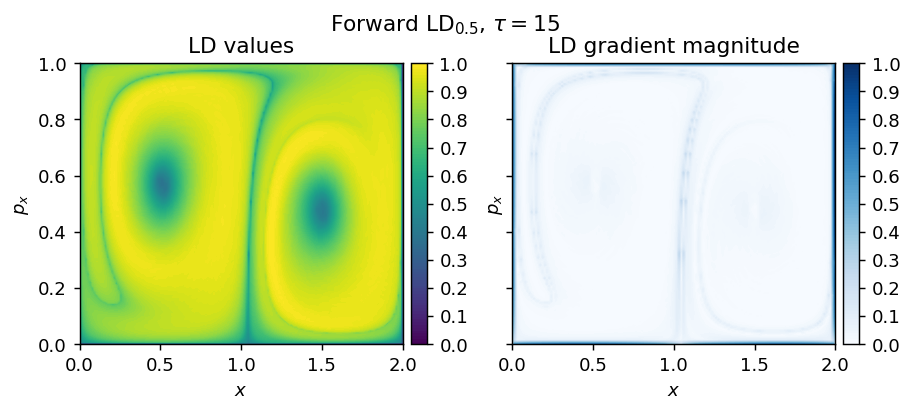

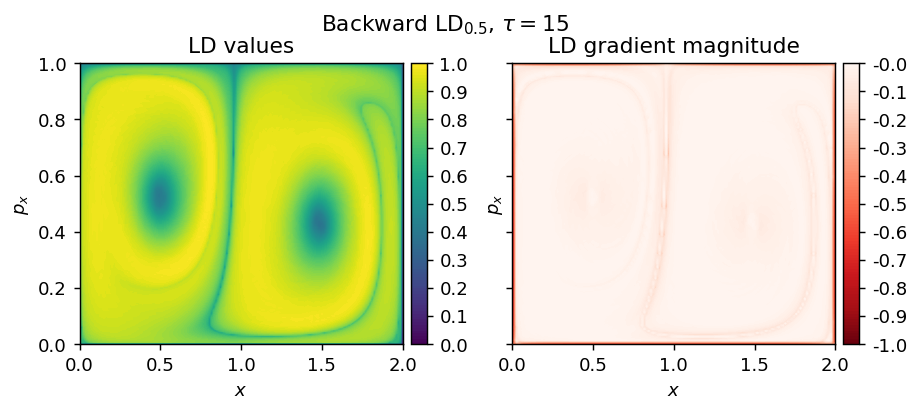

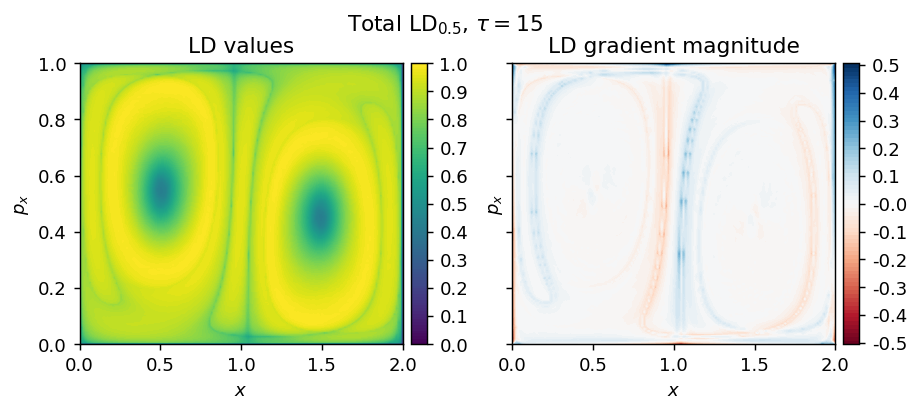

In [17]:
tau = 15

LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

### Calculate LDs ($\tau = 40$)

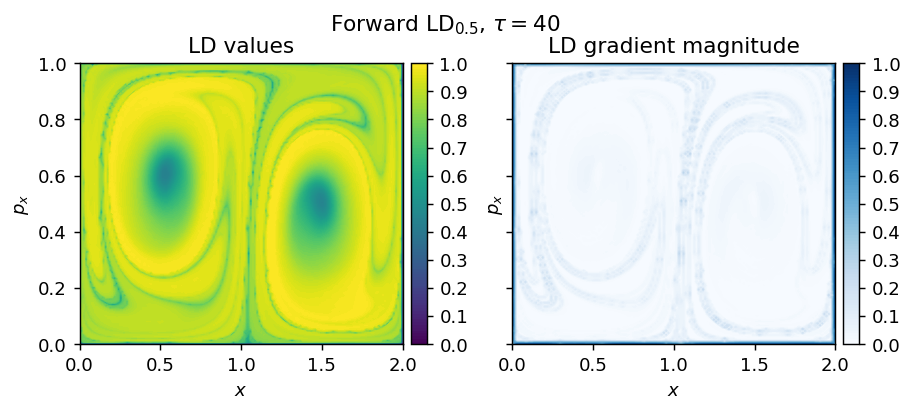

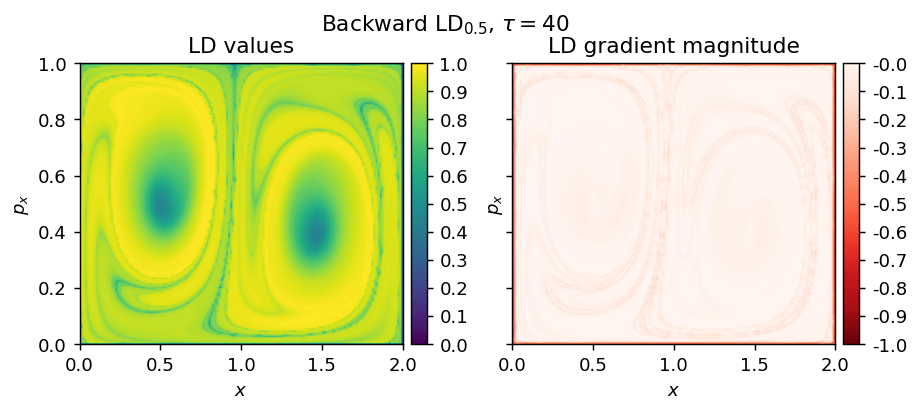

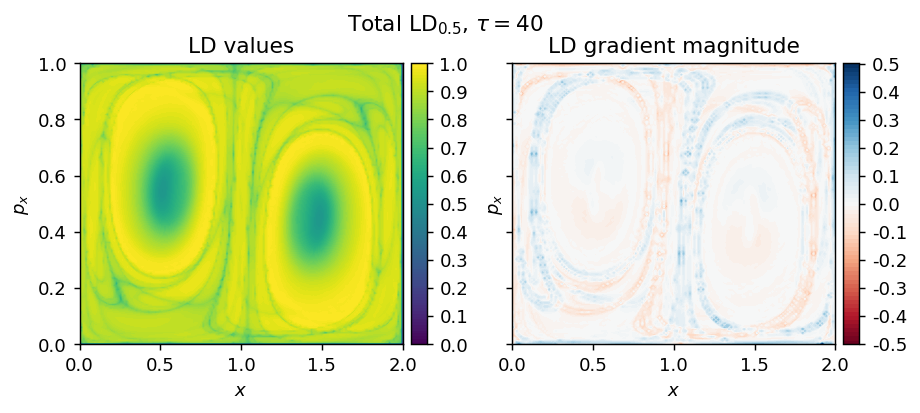

In [18]:
tau = 40

LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

### Change Grid Size to Calculate LDs

In [19]:
# Mesh parameters
x_min,x_max = [0, 2]
y_min,y_max = [0, 1]
Nx, Ny = [600, 600]
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

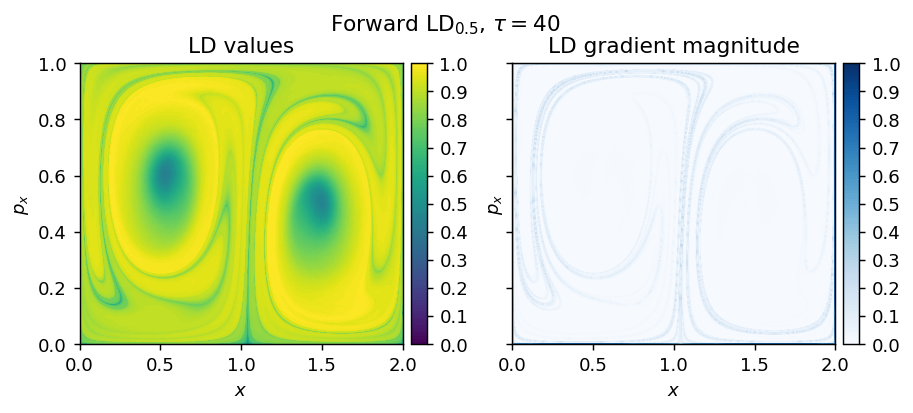

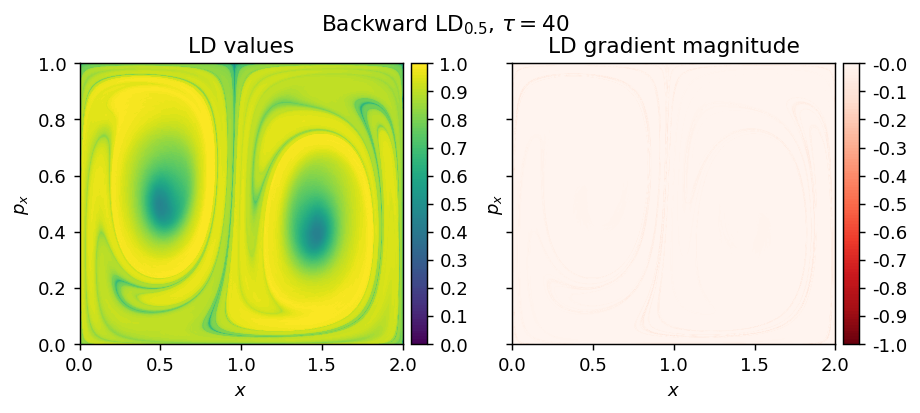

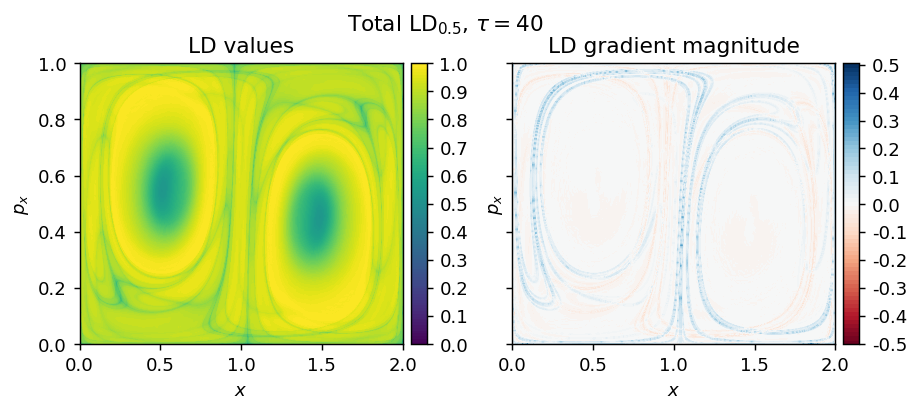

In [20]:
tau = 40

LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)